In [48]:
import pandas as pd
import numpy as np
import re

In [49]:
df=pd.read_csv('laptop_details.csv')
df.head()

,Product,Rating,MRP,Feature
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Product  720 non-null    object 
 1   Rating   581 non-null    float64
 2   MRP      720 non-null    object 
 3   Feature  720 non-null    object 
dtypes: float64(1), object(3)
memory usage: 22.6+ KB


In [51]:
df.shape

(720, 4)

In [52]:
df.describe()

,Rating
count,581.000000
mean,4.321170
std,0.282872
min,3.000000
25%,4.200000
50%,4.300000
75%,4.500000
max,5.000000


In [53]:
reg = r'^(?:AMD|Intel|M1)[\s\w]+Processor'

df['Processor'] = df['Feature'].apply(lambda x : re.findall(reg, x))

In [54]:
reg = r'\d+\sGB[\s\w]+RAM'

df['RAM'] = df['Feature'].apply(lambda x : re.findall(reg, x))

In [55]:

reg = r'[\d]+[\s]bit[\s\w]+Operating System'

df['OS'] = df['Feature'].apply(lambda x : re.findall(reg, x))

In [56]:
reg = r'[\d]+\s(?:GB|TB)\s(?:HDD|SSD)'

df['Storage'] = df['Feature'].apply(lambda x : re.findall(reg, x))

In [57]:
reg = r'^\w+'

df['Brand'] = df['Product'].apply(lambda x : re.findall(reg, x))

In [58]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,"₹36,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[256 GB SSD],[Lenovo]
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,"₹39,990",Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD],[Lenovo]
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,"₹32,990",Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i3 Processor],[8 GB DDR4 RAM],[64 bit Windows 11 Operating System],[512 GB SSD],[ASUS]
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,"₹49,990",AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,[AMD Ryzen 5 Hexa Core Processor],[8 GB DDR4 RAM],[64 bit Windows 10 Operating System],[512 GB SSD],[HP]
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,"₹49,990",Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,[Intel Core i5 Processor],[8 GB DDR4 RAM],[],[512 GB SSD],[ASUS]


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    object 
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM        720 non-null    object 
 6   OS         720 non-null    object 
 7   Storage    720 non-null    object 
 8   Brand      720 non-null    object 
dtypes: float64(1), object(8)
memory usage: 50.8+ KB


In [60]:
df.isnull().sum()

Product        0
Rating       139
MRP            0
Feature        0
Processor      0
RAM            0
OS             0
Storage        0
Brand          0
dtype: int64

In [61]:
df.Processor = df.Processor.apply(lambda x : ''.join(x))
df.RAM = df.RAM.apply(lambda x : ''.join(x))
df.OS = df.OS.apply(lambda x : ''.join(x))
df.Storage = df.Storage.apply(lambda x : ''.join(x))
df.Brand = df.Brand.apply(lambda x : ''.join(x))
df.MRP = df.MRP.apply(lambda x : x.replace('₹', '').replace(',', '')).astype(float)

In [62]:
df.head()

,Product,Rating,MRP,Feature,Processor,RAM,OS,Storage,Brand
0,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/256 ...,4.2,36990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,256 GB SSD,Lenovo
1,Lenovo IdeaPad 3 Core i3 11th Gen - (8 GB/512 ...,4.2,39990.0,Intel Core i3 Processor (11th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,Lenovo
2,ASUS VivoBook 15 (2022) Core i3 10th Gen - (8 ...,4.3,32990.0,Intel Core i3 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i3 Processor,8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,ASUS
3,HP Pavilion Ryzen 5 Hexa Core AMD R5-5600H - (...,4.4,49990.0,AMD Ryzen 5 Hexa Core Processor8 GB DDR4 RAM64...,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,64 bit Windows 10 Operating System,512 GB SSD,HP
4,ASUS TUF Gaming F15 Core i5 10th Gen - (8 GB/5...,4.4,49990.0,Intel Core i5 Processor (10th Gen)8 GB DDR4 RA...,Intel Core i5 Processor,8 GB DDR4 RAM,,512 GB SSD,ASUS


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 720 entries, 0 to 719
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Product    720 non-null    object 
 1   Rating     581 non-null    float64
 2   MRP        720 non-null    float64
 3   Feature    720 non-null    object 
 4   Processor  720 non-null    object 
 5   RAM        720 non-null    object 
 6   OS         720 non-null    object 
 7   Storage    720 non-null    object 
 8   Brand      720 non-null    object 
dtypes: float64(2), object(7)
memory usage: 50.8+ KB


In [64]:
df['Rating'].mean()

4.321170395869192

In [65]:
df['Rating'].median()

4.3

In [66]:
df['Rating']=df['Rating'].fillna('4.3')

In [67]:
df.isnull().sum()

Product      0
Rating       0
MRP          0
Feature      0
Processor    0
RAM          0
OS           0
Storage      0
Brand        0
dtype: int64

In [68]:
df['MRP'].mean()

81605.8375

In [69]:
print(df['MRP'].min())

print(df['MRP'].max())

14990.0
434830.0


In [70]:
df['MRP'].std()

61552.95510244988

In [71]:
df['MRP'].median()

59990.0

In [72]:
print(df['MRP'].quantile(0.25))

print(df['MRP'].quantile(0.75))

38996.75
95240.0


<Axes: >

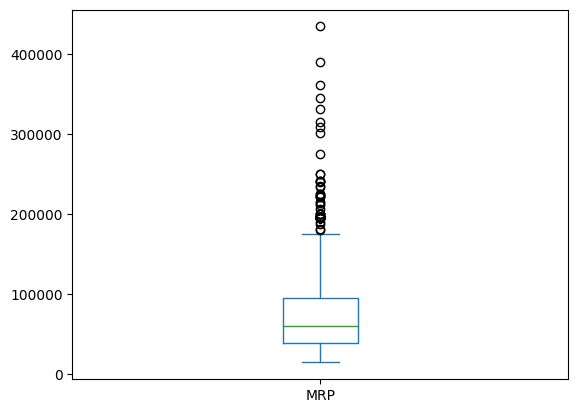

In [73]:
df['MRP'].plot(kind='box')

<Axes: ylabel='Density'>

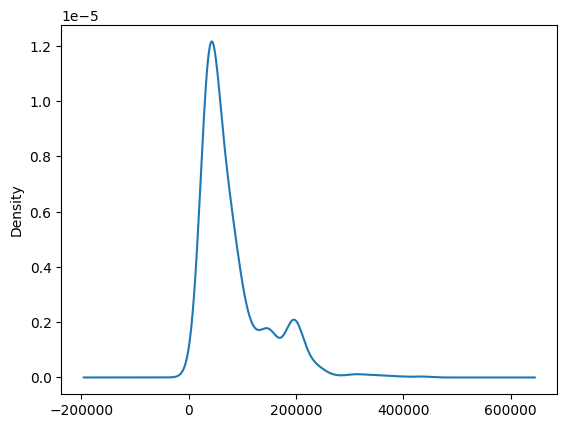

In [74]:
df['MRP'].plot(kind='kde')

<Axes: title={'center': 'MRP'}, xlabel='Storage'>

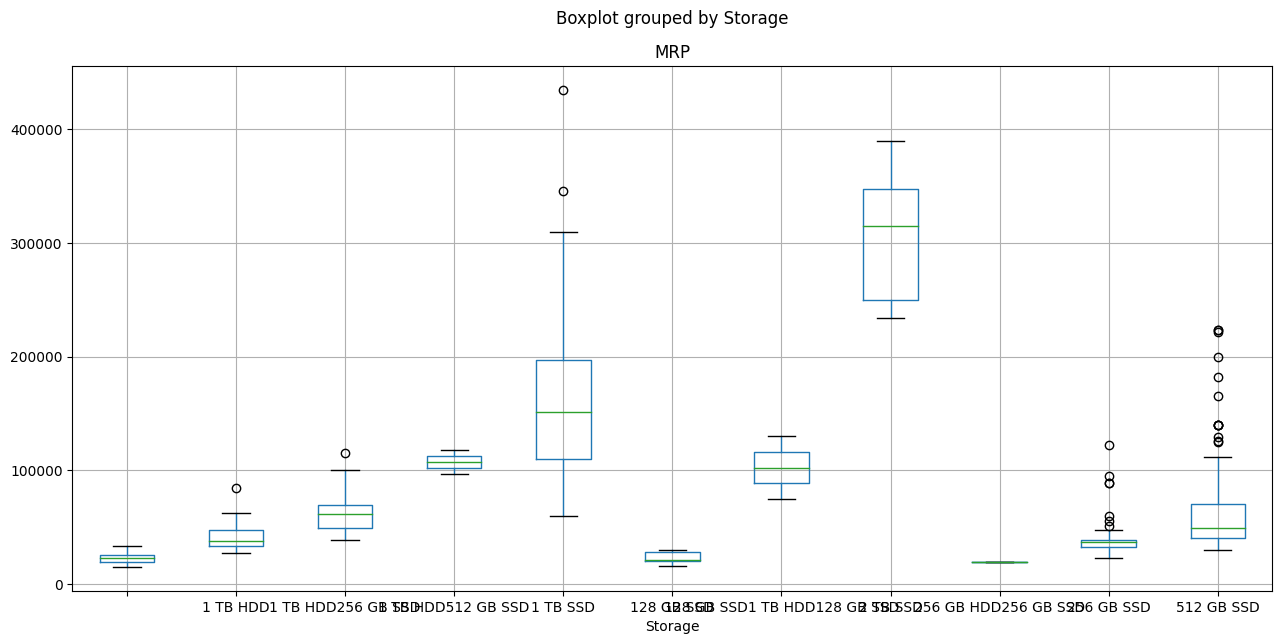

In [75]:
df.boxplot(column='MRP', by='Storage', figsize=(15, 7))

<Axes: title={'center': 'MRP'}, xlabel='Brand'>

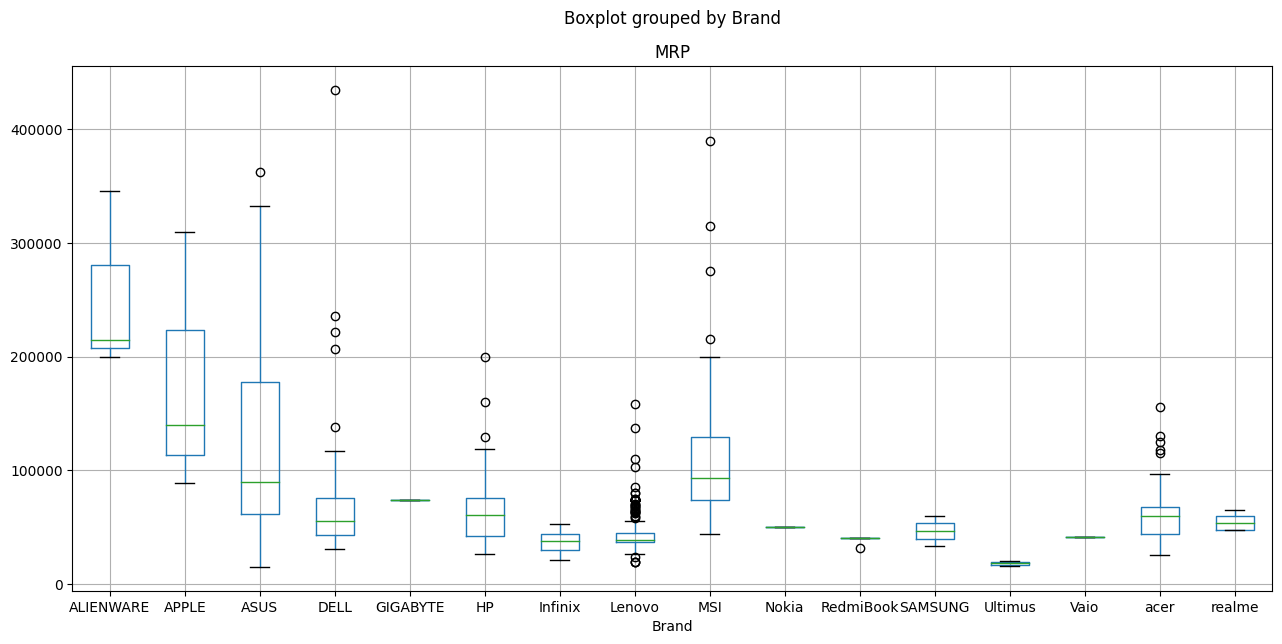

In [76]:
df.boxplot(column='MRP', by='Brand', figsize=(15, 7))


<Axes: xlabel='Brand'>

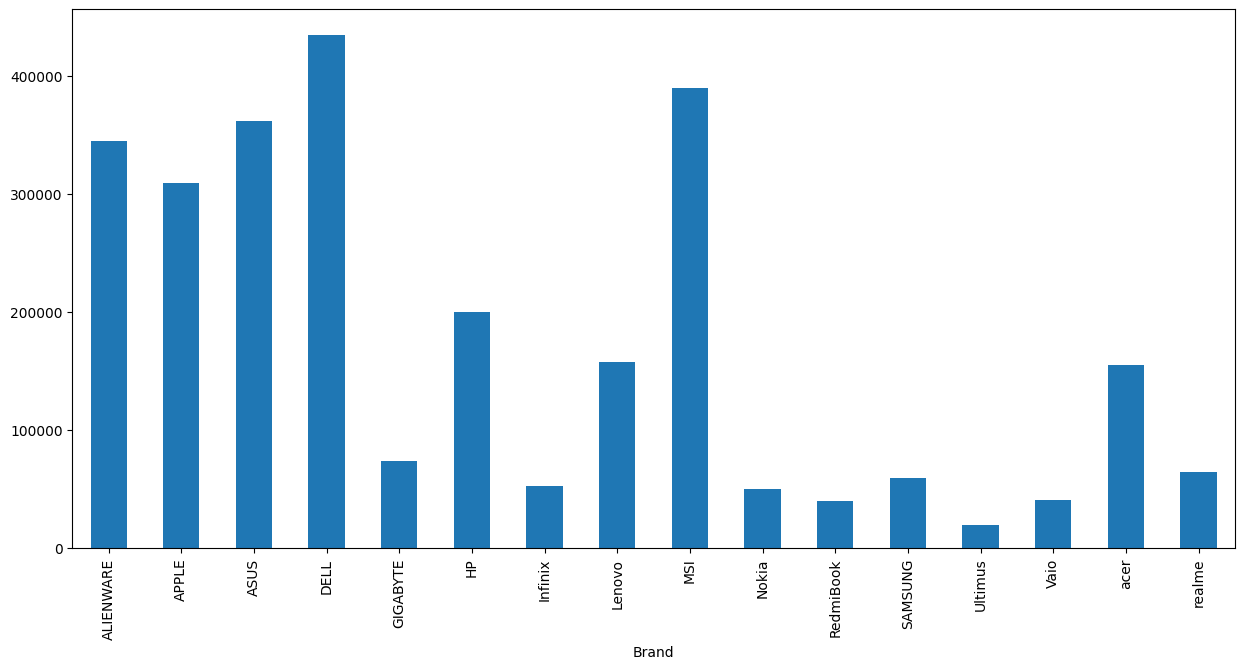

In [77]:
df.groupby(['Brand'])['MRP'].max().plot(kind = 'bar' ,figsize=(15,7))

<Axes: title={'center': 'MRP'}, xlabel='Rating'>

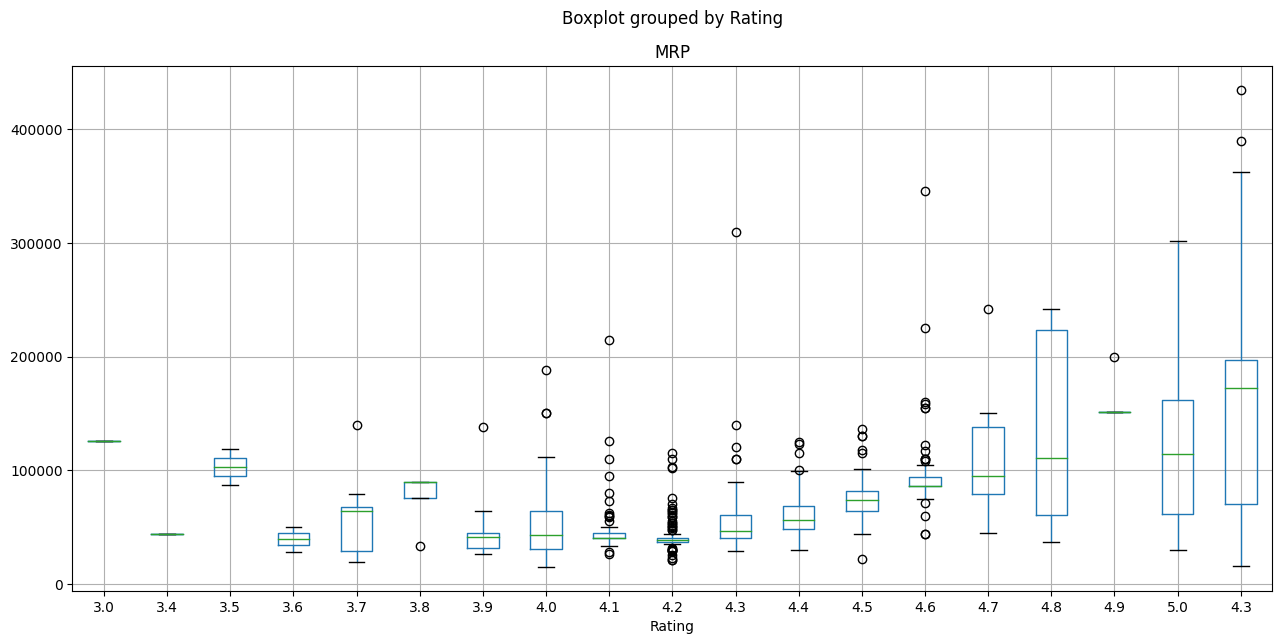

In [78]:
df.boxplot(column='MRP', by='Rating', figsize=(15, 7))

In [79]:
cleaned_data=df.to_csv('laptop_sales.csv', index=False)

In [80]:
from google.colab import files
files.download('laptop_sales.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>